In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('bank_train.csv')
test=pd.read_csv('bank_test.csv')

train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,76,retired,married,secondary,no,2302.0,no,no,telephone,5,feb,110,1,87,2,failure,no
1,66,retired,divorced,unknown,no,53.0,no,no,cellular,12,jul,562,4,-1,0,unknown,yes
2,51,management,married,tertiary,no,2455.0,yes,no,cellular,21,jul,553,1,-1,0,unknown,yes
3,41,blue-collar,married,secondary,no,356.0,yes,no,cellular,14,may,90,5,-1,0,unknown,no
4,51,technician,married,secondary,no,-1944.0,yes,no,cellular,7,may,623,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4461,33,management,married,tertiary,no,133.0,yes,no,unknown,26,may,308,4,-1,0,unknown,no
4462,39,services,divorced,secondary,no,687.0,yes,no,cellular,9,jul,869,1,-1,0,unknown,yes
4463,40,admin.,single,secondary,no,2040.0,yes,no,cellular,18,may,906,2,350,2,failure,yes
4464,31,technician,single,secondary,no,628.0,yes,no,unknown,12,may,1083,2,-1,0,unknown,no


## Solution 1

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4466 entries, 0 to 4465
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4466 non-null   int64  
 1   job        4466 non-null   object 
 2   marital    4466 non-null   object 
 3   education  4466 non-null   object 
 4   default    4466 non-null   object 
 5   balance    4465 non-null   float64
 6   housing    4466 non-null   object 
 7   loan       4466 non-null   object 
 8   contact    4466 non-null   object 
 9   day        4466 non-null   int64  
 10  month      4466 non-null   object 
 11  duration   4466 non-null   int64  
 12  campaign   4466 non-null   int64  
 13  pdays      4466 non-null   int64  
 14  previous   4466 non-null   int64  
 15  poutcome   4465 non-null   object 
 16  deposit    4466 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 593.3+ KB


10 columns contain categorical values

## Solution 2

In [4]:
train[train.isnull().any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3105,36,services,single,secondary,no,NaN,no,no,unknown,17,jun,256,9,-1,0,unknown,no
3537,44,blue-collar,married,secondary,no,294.0,yes,no,unknown,19,may,66,2,-1,0,NaN,no


In [5]:
train2=train.dropna()

2 rows have missing values

## Solution 3

In [6]:
pd.crosstab(index=train2['deposit'],columns=train2['education'],normalize='columns')

education,primary,secondary,tertiary,unknown
deposit,,,,
no,0.592965,0.565177,0.449535,0.494737
yes,0.407035,0.434823,0.550465,0.505263


56.518 % of clients with secondary education have not subscribed to a deposit

## Solution 4

<AxesSubplot:xlabel='marital', ylabel='count'>

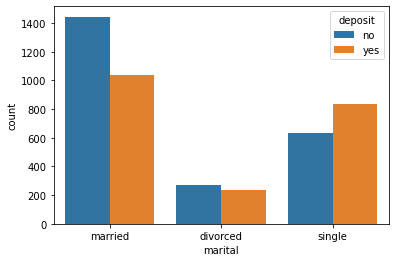

In [7]:
sns.countplot(data=train2,x='marital',hue='deposit')

Single

## Solution 5

In [8]:
train3=train2[train2['deposit']=='no']

In [9]:
train3[(train3['housing']=='yes') | (train3['loan']=='yes')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,41,blue-collar,married,secondary,no,356.0,yes,no,cellular,14,may,90,5,-1,0,unknown,no
7,34,blue-collar,married,primary,no,5299.0,yes,no,unknown,26,jun,75,5,-1,0,unknown,no
9,44,blue-collar,married,secondary,no,879.0,yes,no,cellular,3,apr,383,1,-1,0,unknown,no
10,34,services,married,secondary,no,1637.0,yes,no,cellular,21,nov,107,4,-1,0,unknown,no
12,32,management,married,tertiary,no,9214.0,no,yes,unknown,18,oct,71,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456,54,blue-collar,married,secondary,no,-102.0,yes,no,cellular,27,aug,164,7,-1,0,unknown,no
4457,43,management,married,tertiary,no,1336.0,yes,yes,cellular,27,may,82,2,309,1,failure,no
4460,54,retired,married,secondary,no,522.0,no,yes,cellular,14,jul,81,3,-1,0,unknown,no
4461,33,management,married,tertiary,no,133.0,yes,no,unknown,26,may,308,4,-1,0,unknown,no


1493 clients who have not subscribed to a deposit have a housing or personal loan.

## Solution 6

In [10]:
train4=train2[train2['poutcome']=='success']

In [11]:
train4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
19,76,self-employed,married,unknown,no,4984.0,no,no,telephone,28,apr,403,1,182,1,success,yes
21,33,admin.,married,tertiary,no,79.0,yes,no,cellular,5,may,389,1,195,4,success,yes
45,71,retired,divorced,secondary,no,0.0,no,no,cellular,26,feb,771,1,171,1,success,yes
51,68,retired,married,secondary,no,1146.0,no,no,cellular,13,may,356,1,71,5,success,yes
52,46,management,married,tertiary,no,273.0,yes,no,cellular,18,mar,910,2,184,4,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,29,housemaid,single,tertiary,no,19.0,no,no,cellular,4,may,268,1,88,4,success,yes
4413,27,management,single,secondary,no,843.0,no,no,cellular,12,jul,123,2,185,1,success,no
4419,37,management,married,tertiary,no,393.0,yes,no,cellular,12,aug,62,2,104,2,success,no
4448,27,blue-collar,single,secondary,no,535.0,no,no,cellular,16,aug,265,3,95,4,success,yes


In [12]:
train4[train4['deposit']=='yes']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
19,76,self-employed,married,unknown,no,4984.0,no,no,telephone,28,apr,403,1,182,1,success,yes
21,33,admin.,married,tertiary,no,79.0,yes,no,cellular,5,may,389,1,195,4,success,yes
45,71,retired,divorced,secondary,no,0.0,no,no,cellular,26,feb,771,1,171,1,success,yes
51,68,retired,married,secondary,no,1146.0,no,no,cellular,13,may,356,1,71,5,success,yes
52,46,management,married,tertiary,no,273.0,yes,no,cellular,18,mar,910,2,184,4,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,38,admin.,divorced,secondary,no,19.0,yes,no,cellular,5,feb,1130,3,251,2,success,yes
4372,20,student,single,secondary,no,215.0,no,no,cellular,24,feb,175,1,92,6,success,yes
4376,42,technician,married,secondary,no,994.0,yes,no,cellular,12,nov,227,3,93,6,success,yes
4408,29,housemaid,single,tertiary,no,19.0,no,no,cellular,4,may,268,1,88,4,success,yes


In [13]:
392/435

0.9011494252873563

90.11% of clients have subscribed to a term deposit as an outcome of the successful marketing campaign.

## Solution 7

<AxesSubplot:xlabel='age', ylabel='balance'>

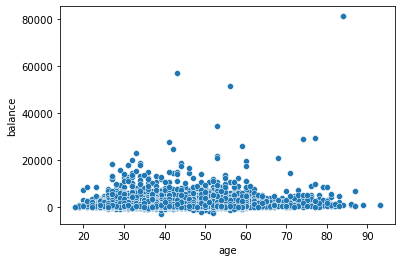

In [14]:
sns.scatterplot(data=train2,x='age',y='balance')

Across all age groups, the average yearly bank balance of most of the clients is less than 20,000 euros

## Solution 8 - 12

### Data cleaning

In [15]:
test[test.isnull().any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
44,57,technician,married,primary,no,3376,yes,no,telephone,2,jun,421,2,-1,NaN,unknown,yes


In [16]:
test2=test.dropna()

In [17]:
trainf=pd.get_dummies(data=train2,drop_first=True)
testf=pd.get_dummies(data=test2,drop_first=True)

In [18]:
X_train=trainf.drop('deposit_yes',axis=1)
y_train=trainf['deposit_yes']

X_test=testf.drop('deposit_yes',axis=1)
y_test=testf['deposit_yes']

### Model creation (KNN with n=7)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [20]:
y_train

0       0
1       1
2       1
3       0
4       1
       ..
4461    0
4462    1
4463    1
4464    0
4465    0
Name: deposit_yes, Length: 4464, dtype: uint8

In [21]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knnpred=knn.predict(X_test)

In [26]:
accuracy_score(y_test,knnpred)

0.767921146953405

The accuracy of the model is 77%

In [28]:
missclassified=y_test!=knnpred
missclassified.value_counts()

False    857
True     259
Name: deposit_yes, dtype: int64

259 samples were misclassified

In [25]:
print(confusion_matrix(y_test,knnpred))

[[490 116]
 [143 367]]


In [32]:
confusion_metrics(confusion_matrix(y_test,knnpred))

True Positives: 367
True Negatives: 490
False Positives: 116
False Negatives: 143
--------------------------------------------------
Accuracy: 0.77
Mis-Classification: 0.23
Sensitivity: 0.72
Specificity: 0.81
Precision: 0.81
f_1 Score: 0.76


Sensitivity is 0.72

Specificity is 0.81

Prevalence = (TP+FN)/(TP+TN+FP+FN) = 0.46


## Solution 13-15

### Model creation (Logistic regression)

In [33]:
from sklearn.linear_model import LogisticRegression

In [44]:
logreg=LogisticRegression(random_state=0,max_iter=3000)
logreg.fit(X_train,y_train)
logpred=logreg.predict(X_test)

In [45]:
print(confusion_matrix(y_test,logpred))

[[517  89]
 [105 405]]


In [46]:
confusion_metrics(confusion_matrix(y_test,logpred))

True Positives: 405
True Negatives: 517
False Positives: 89
False Negatives: 105
--------------------------------------------------
Accuracy: 0.83
Mis-Classification: 0.17
Sensitivity: 0.79
Specificity: 0.85
Precision: 0.85
f_1 Score: 0.82


Sensitivity is 0.79

Specificity is 0.85

Prevalence = (TP+FN)/(TP+TN+FP+FN) = 0.46

---

In [30]:
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')